In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
df=pd.read_csv('./data/무신사 데이터 전처리 +감성분석 결과240122.csv',index_col='Unnamed: 0')
df

,major_category,middle_category,name,number,limit,exclusive,target_gender,buy_gender,buy_age,view,like,price,discount_rate,delivery_date,rating,review,buy,score,buy_age1,buy_age2
0,상의,셔츠/블라우스,오버사이즈 16골 에센셜 코듀로이 셔츠 블랙,22FWGS28BK,1,0,2,0.0,"('29~33세', 0)",1200.0,493,39800.0,20,19.0,4.6,36,50.0,0.976190,4,0
1,상의,니트/스웨터,TD5-SW01 램스울 라운드 니트-만다린오렌지,TD5-SW01_MAO,1,0,0,0.0,"('29~33세', 0)",4900.0,650,53550.0,10,5.0,4.9,61,200.0,0.954545,4,0
2,상의,후드 티셔츠,[SET UP] PPP 플라워 후드 셋업_멜란지 그레이,KBCS1TH003MGKBCS1PL003MGKBCS1PS003MG,1,0,2,1.0,"('19~23세', 0)",3600.0,2536,49900.0,49,5.0,4.8,41,150.0,1.000000,2,0
3,상의,후드 티셔츠,TIE DYE 후드티 Olive Green,CTTZPHD01UG4,0,0,0,0.0,"('40세~', 0)",1000.0,569,19800.0,80,5.0,4.8,62,150.0,0.971429,6,0
4,상의,긴소매 티셔츠,essential turtleneck logo top - pink,BT23WTS002PIKF,1,0,1,1.0,"('24~28세', 0)",11000.0,2561,43000.0,0,28.0,4.8,34,100.0,0.964286,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4926,아우터,숏패딩/숏헤비 아우터,다운 숏 푸퍼-블랙,P22FWOT001,0,0,2,0.0,"('19~23세', 0)",2900.0,771,139000.0,43,5.0,4.9,17,50.0,0.964286,2,0
4927,아우터,스포츠/용품,나일론 아노락 자켓 - 블랙 / 2033B427-001,2033B427-001,0,1,0,0.0,"('24~28세', 0)",2100.0,1275,87200.0,20,4.0,4.9,222,300.0,0.987500,3,0
4928,아우터,패딩 베스트,[MENS] 리버서블 패딩 조끼(10 color),HBA-VT-M201,0,0,0,0.0,"('34~39세', 0)",1400.0,198,38400.0,60,5.0,4.8,33,100.0,0.976190,5,0
4929,아우터,숏패딩/숏헤비 아우터,숏 미니멀 덕다운 패딩 블랙,3001,0,1,0,0.0,"('29~33세', 0)",3300.0,2028,238400.0,20,7.0,4.8,87,100.0,0.988095,4,0


In [ ]:
df['major_category'].unique()

array(['상의', '바지', '스포츠/용품', '아우터'], dtype=object)

In [ ]:
df['major_category'] == '스포츠/용품'

0       False
1       False
2       False
3       False
4       False
        ...  
4926    False
4927    False
4928    False
4929    False
4930    False
Name: major_category, Length: 4931, dtype: bool

In [ ]:
# 잘못 들어간 스포츠/용품을 바꾸기
df.loc[df.middle_category == '하의', 'major_category'] = '바지'
df.loc[df.middle_category == '하의','middle_category'] = '스포츠/용품'

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['major_category'])
le.classes_

array(['바지', '상의', '아우터'], dtype=object)

In [ ]:
#transform()은 fit을 한 다음에 실행한다.
le.transform(df['major_category'])

df['major_category'] = le.transform(df['major_category'])

In [ ]:
le = LabelEncoder()
le.fit(df['middle_category'])
le.transform(df['middle_category'])

df['middle_category'] = le.transform(df['middle_category'])

In [ ]:
df.head(2)

,major_category,middle_category,name,number,limit,exclusive,target_gender,buy_gender,buy_age,view,like,price,discount_rate,delivery_date,rating,review,buy,score,buy_age1,buy_age2
0,1,19,오버사이즈 16골 에센셜 코듀로이 셔츠 블랙,22FWGS28BK,1,0,2,0.0,"('29~33세', 0)",1200.0,493,39800.0,20,19.0,4.6,36,50.0,0.976190,4,0
1,1,8,TD5-SW01 램스울 라운드 니트-만다린오렌지,TD5-SW01_MAO,1,0,0,0.0,"('29~33세', 0)",4900.0,650,53550.0,10,5.0,4.9,61,200.0,0.954545,4,0


In [ ]:
import copy
# 결측치 처리 완료 df 백업
backup = df.copy()

In [ ]:
df = backup.copy()
df.drop_duplicates().shape

(4931, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4931 entries, 0 to 4930
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   major_category   4931 non-null   int64  
 1   middle_category  4931 non-null   int64  
 2   name             4931 non-null   object 
 3   number           4931 non-null   object 
 4   limit            4931 non-null   int64  
 5   exclusive        4931 non-null   int64  
 6   target_gender    4931 non-null   int64  
 7   buy_gender       4931 non-null   float64
 8   buy_age          4931 non-null   object 
 9   view             4931 non-null   float64
 10  like             4931 non-null   int64  
 11  price            4931 non-null   float64
 12  discount_rate    4931 non-null   int64  
 13  delivery_date    4931 non-null   float64
 14  rating           4931 non-null   float64
 15  review           4931 non-null   int64  
 16  buy              4931 non-null   float64
 17  score         

---

## 다중회귀(1)

In [ ]:
X = df.drop(['name','number','buy_age','buy','major_category','middle_category'],axis=1)
print(X)
y = df["buy"]
print('\n')
print(y)

      limit  exclusive  target_gender  buy_gender     view  like     price  \
0         1          0              2         0.0   1200.0   493   39800.0   
1         1          0              0         0.0   4900.0   650   53550.0   
2         1          0              2         1.0   3600.0  2536   49900.0   
3         0          0              0         0.0   1000.0   569   19800.0   
4         1          0              1         1.0  11000.0  2561   43000.0   
...     ...        ...            ...         ...      ...   ...       ...   
4926      0          0              2         0.0   2900.0   771  139000.0   
4927      0          1              0         0.0   2100.0  1275   87200.0   
4928      0          0              0         0.0   1400.0   198   38400.0   
4929      0          1              0         0.0   3300.0  2028  238400.0   
4930      1          0              2         1.0    400.0   368   53000.0   

      discount_rate  delivery_date  rating  review     score  b

In [ ]:
# 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=13)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly=PolynomialFeatures(include_bias=False)
poly.fit(X_train)
train_poly=poly.transform(X_train)
print(train_poly.shape)

(3698, 119)


In [ ]:
poly.get_feature_names_out()

array(['limit', 'exclusive', 'target_gender', 'buy_gender', 'view',
       'like', 'price', 'discount_rate', 'delivery_date', 'rating',
       'review', 'score', 'buy_age1', 'buy_age2', 'limit^2',
       'limit exclusive', 'limit target_gender', 'limit buy_gender',
       'limit view', 'limit like', 'limit price', 'limit discount_rate',
       'limit delivery_date', 'limit rating', 'limit review',
       'limit score', 'limit buy_age1', 'limit buy_age2', 'exclusive^2',
       'exclusive target_gender', 'exclusive buy_gender',
       'exclusive view', 'exclusive like', 'exclusive price',
       'exclusive discount_rate', 'exclusive delivery_date',
       'exclusive rating', 'exclusive review', 'exclusive score',
       'exclusive buy_age1', 'exclusive buy_age2', 'target_gender^2',
       'target_gender buy_gender', 'target_gender view',
       'target_gender like', 'target_gender price',
       'target_gender discount_rate', 'target_gender delivery_date',
       'target_gender rating', 

In [ ]:
test_poly=poly.transform(X_test)
print(test_poly.shape)

(1233, 119)


- 다중회귀모델 훈련

In [ ]:
from sklearn.linear_model import LinearRegression

# 모델링
reg = LinearRegression()
reg.fit(train_poly, y_train)

print(reg.score(train_poly, y_train))
print(reg.score(test_poly,y_test))

0.955703045779865
-1.5662402481561664


- 정규화

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

릿지 회귀 (계수를 제곱한 값으로 기준으로 규제를 적용)

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, y_train)
print(ridge.score(train_scaled, y_train))
print(ridge.score(test_scaled,y_test))

0.9545173847036246
-1.345804224155554


적절한 R^2값 구하기

In [ ]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

In [ ]:
alpha_list =[10, 100, 1000, 10000, 100000, 1000000]
for alpha in alpha_list:
    # 릿지 모델을 만듭니다
    ridge = Ridge(alpha=alpha)
    # 릿지 모델을 훈련합니다
    ridge.fit(train_scaled,  y_train)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(ridge.score(train_scaled, y_train))
    test_score.append(ridge.score(test_scaled, y_test))

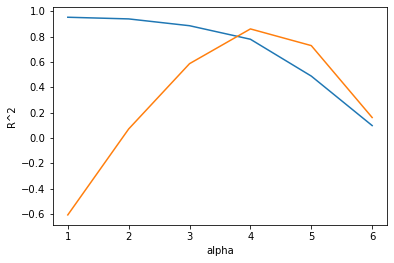

In [ ]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=7000)
ridge.fit(train_scaled, y_train)
print(ridge.score(train_scaled, y_train))
print(ridge.score(test_scaled,y_test))

0.7991525586889301
0.835215814702833


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
# regression은 분류문제와 같이 accuracy 같은 것이 없기 때문에
# regression에 맞는 모델 성능 지표를 써야한다.
# 대표적인 것이 mse이다


pred_tr = ridge.predict(train_scaled)
pred_test = ridge.predict(test_scaled)

rmse_tr = np.sqrt(mean_squared_error(y_train, pred_tr))
rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))

print("RMSE of Train Data : ", rmse_tr)
print("RMSE of Test Data : ", rmse_test)

mae_tr = mean_absolute_error(y_train, pred_tr)
mae_test = mean_absolute_error(y_test, pred_test)
print('\n')
print("MAE of Train Data : ", mae_tr)
print("MAE of Test Data : ", mae_test)


mse_tr = mean_squared_error(y_train, pred_tr)
mse_test =mean_squared_error(y_test, pred_test)
print('\n')
print("MSE of Train Data : ", mse_tr)
print("MSE of Test Data : ", mse_test)

RMSE of Train Data :  2847.8402610478074
RMSE of Test Data :  2216.2068891750528


MAE of Train Data :  625.8099331180468
MAE of Test Data :  622.1676685070173


MSE of Train Data :  8110194.152444845
MSE of Test Data :  4911572.975626965


라쏘 회귀 (계수의 절대값을 기준으로 규제를 적용)

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, y_train)
print(lasso.score(train_scaled, y_train))

0.9538821767243197


/Users/aragbagofideas/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.923e+09, tolerance: 1.493e+07
  model = cd_fast.enet_coordinate_descent(


In [ ]:
print(lasso.score(test_scaled, y_test))

-1.0989848372886737


In [ ]:
train_score = []
test_score = []

alpha_list =[0.1, 1, 10, 100, 1000, 10000]
for alpha in alpha_list:
    # 라쏘 모델을 만듭니다
    lasso = Lasso(alpha=alpha, max_iter=10000)
    # 라쏘 모델을 훈련합니다
    lasso.fit(train_scaled, y_train)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(lasso.score(train_scaled, y_train))
    test_score.append(lasso.score(test_scaled, y_test))

/Users/aragbagofideas/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.590e+09, tolerance: 1.493e+07
  model = cd_fast.enet_coordinate_descent(
/Users/aragbagofideas/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.101e+08, tolerance: 1.493e+07
  model = cd_fast.enet_coordinate_descent(


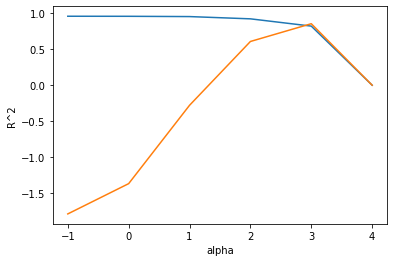

In [ ]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [ ]:
lasso = Lasso(alpha=800)
lasso.fit(train_scaled, y_train)


print(lasso.score(train_scaled,y_train))
print(lasso.score(test_scaled, y_test))

0.8360125013058824
0.8327652428495897


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
# regression은 분류문제와 같이 accuracy 같은 것이 없기 때문에
# regression에 맞는 모델 성능 지표를 써야한다.
# 대표적인 것이 mse이다


pred_tr = lasso.predict(train_scaled)
pred_test = lasso.predict(test_scaled)

rmse_tr = np.sqrt(mean_squared_error(y_train, pred_tr))
rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))

print("RMSE of Train Data : ", rmse_tr)
print("RMSE of Test Data : ", rmse_test)

mae_tr = mean_absolute_error(y_train, pred_tr)
mae_test = mean_absolute_error(y_test, pred_test)
print('\n')
print("MAE of Train Data : ", mae_tr)
print("MAE of Test Data : ", mae_test)


mse_tr = mean_squared_error(y_train, pred_tr)
mse_test =mean_squared_error(y_test, pred_test)
print('\n')
print("MSE of Train Data : ", mse_tr)
print("MSE of Test Data : ", mse_test)

RMSE of Train Data :  2573.2847402626307
RMSE of Test Data :  2232.625125612247


MAE of Train Data :  612.242355821648
MAE of Test Data :  622.9666646906354


MSE of Train Data :  6621794.354468515
MSE of Test Data :  4984614.951515102


###  x 데이터로 쓰이는 변수 들 중 buy값과 상관계수가 높은 3순위 변수 데이터 추가 전처리

In [ ]:
abs(df.corr().loc['buy']).sort_values()

buy_age2           0.007364
middle_category    0.025842
discount_rate      0.025925
rating             0.027764
delivery_date      0.031156
exclusive          0.047586
limit              0.061756
buy_age1           0.071595
buy_gender         0.071988
target_gender      0.077322
major_category     0.083946
price              0.085216
score              0.098590
view               0.562318
like               0.814722
review             0.890346
buy                1.000000
Name: buy, dtype: float64

<AxesSubplot:>

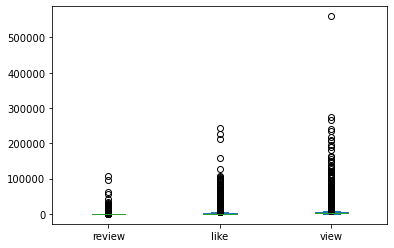

In [ ]:
df[['review','like','view']].plot(kind='box')

In [ ]:
df_refined=df
df_refined

,major_category,middle_category,name,number,limit,exclusive,target_gender,buy_gender,buy_age,view,like,price,discount_rate,delivery_date,rating,review,buy,score,buy_age1,buy_age2
0,1,19,오버사이즈 16골 에센셜 코듀로이 셔츠 블랙,22FWGS28BK,1,0,2,0.0,"('29~33세', 0)",1200.0,493,39800.0,20,19.0,4.6,36,50.0,0.976190,4,0
1,1,8,TD5-SW01 램스울 라운드 니트-만다린오렌지,TD5-SW01_MAO,1,0,0,0.0,"('29~33세', 0)",4900.0,650,53550.0,10,5.0,4.9,61,200.0,0.954545,4,0
2,1,38,[SET UP] PPP 플라워 후드 셋업_멜란지 그레이,KBCS1TH003MGKBCS1PL003MGKBCS1PS003MG,1,0,2,1.0,"('19~23세', 0)",3600.0,2536,49900.0,49,5.0,4.8,41,150.0,1.000000,2,0
3,1,38,TIE DYE 후드티 Olive Green,CTTZPHD01UG4,0,0,0,0.0,"('40세~', 0)",1000.0,569,19800.0,80,5.0,4.8,62,150.0,0.971429,6,0
4,1,6,essential turtleneck logo top - pink,BT23WTS002PIKF,1,0,1,1.0,"('24~28세', 0)",11000.0,2561,43000.0,0,28.0,4.8,34,100.0,0.964286,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4926,2,21,다운 숏 푸퍼-블랙,P22FWOT001,0,0,2,0.0,"('19~23세', 0)",2900.0,771,139000.0,43,5.0,4.9,17,50.0,0.964286,2,0
4927,2,25,나일론 아노락 자켓 - 블랙 / 2033B427-001,2033B427-001,0,1,0,0.0,"('24~28세', 0)",2100.0,1275,87200.0,20,4.0,4.9,222,300.0,0.987500,3,0
4928,2,33,[MENS] 리버서블 패딩 조끼(10 color),HBA-VT-M201,0,0,0,0.0,"('34~39세', 0)",1400.0,198,38400.0,60,5.0,4.8,33,100.0,0.976190,5,0
4929,2,21,숏 미니멀 덕다운 패딩 블랙,3001,0,1,0,0.0,"('29~33세', 0)",3300.0,2028,238400.0,20,7.0,4.8,87,100.0,0.988095,4,0


- 이상치 제거

In [ ]:
# 1.5배 이상인 데이터 삭제
Q1 = df_refined[['review','like', 'view']].quantile(q=0.25)
Q3 = df_refined[['review','like', 'view']].quantile(q=0.75)
print(Q1)
print(Q3)

review      15.0
like       399.0
view      1400.0
Name: 0.25, dtype: float64
review     136.5
like      2455.5
view      4500.0
Name: 0.75, dtype: float64


In [ ]:
IQR = Q3-Q1

IQR_df = df_refined[(df_refined['view'] <= Q3['view']+1.5*IQR['view']) & (df_refined['view'] >= Q1['view']-1.5*IQR['view'])]
IQR_df = IQR_df[(IQR_df['like'] <= Q3['like']+1.5*IQR['like']) & (IQR_df['like'] >= Q1['like']-1.5*IQR['like'])]
IQR_df = IQR_df[(IQR_df['review'] <= Q3['review']+1.5*IQR['review']) & (IQR_df['review'] >= Q1['review']-1.5*IQR['review'])]
# IQR_df = IQR_df[['view','like','review']]


print('original_df :', len(df_refined))
print('IQR_df :', len(IQR_df))

original_df : 4931
IQR_df : 3877


In [ ]:
IQR_df

,major_category,middle_category,name,number,limit,exclusive,target_gender,buy_gender,buy_age,view,like,price,discount_rate,delivery_date,rating,review,buy,score,buy_age1,buy_age2
0,1,19,오버사이즈 16골 에센셜 코듀로이 셔츠 블랙,22FWGS28BK,1,0,2,0.0,"('29~33세', 0)",1200.0,493,39800.0,20,19.0,4.6,36,50.0,0.976190,4,0
1,1,8,TD5-SW01 램스울 라운드 니트-만다린오렌지,TD5-SW01_MAO,1,0,0,0.0,"('29~33세', 0)",4900.0,650,53550.0,10,5.0,4.9,61,200.0,0.954545,4,0
2,1,38,[SET UP] PPP 플라워 후드 셋업_멜란지 그레이,KBCS1TH003MGKBCS1PL003MGKBCS1PS003MG,1,0,2,1.0,"('19~23세', 0)",3600.0,2536,49900.0,49,5.0,4.8,41,150.0,1.000000,2,0
3,1,38,TIE DYE 후드티 Olive Green,CTTZPHD01UG4,0,0,0,0.0,"('40세~', 0)",1000.0,569,19800.0,80,5.0,4.8,62,150.0,0.971429,6,0
5,1,8,린넨 코튼 니트 후디 DUSTY GREEN,IM2C2KT03GE,1,0,0,0.0,"('24~28세', 0)",2800.0,442,108000.0,30,5.0,4.9,12,50.0,1.000000,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4926,2,21,다운 숏 푸퍼-블랙,P22FWOT001,0,0,2,0.0,"('19~23세', 0)",2900.0,771,139000.0,43,5.0,4.9,17,50.0,0.964286,2,0
4927,2,25,나일론 아노락 자켓 - 블랙 / 2033B427-001,2033B427-001,0,1,0,0.0,"('24~28세', 0)",2100.0,1275,87200.0,20,4.0,4.9,222,300.0,0.987500,3,0
4928,2,33,[MENS] 리버서블 패딩 조끼(10 color),HBA-VT-M201,0,0,0,0.0,"('34~39세', 0)",1400.0,198,38400.0,60,5.0,4.8,33,100.0,0.976190,5,0
4929,2,21,숏 미니멀 덕다운 패딩 블랙,3001,0,1,0,0.0,"('29~33세', 0)",3300.0,2028,238400.0,20,7.0,4.8,87,100.0,0.988095,4,0


<AxesSubplot:>

<Figure size 864x720 with 0 Axes>

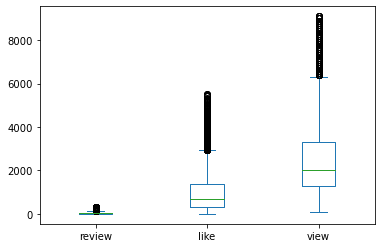

In [ ]:
plt.figure(figsize=(12,10))
IQR_df[['review','like','view']].plot(kind='box')

In [ ]:
df=IQR_df
df

,major_category,middle_category,name,number,limit,exclusive,target_gender,buy_gender,buy_age,view,like,price,discount_rate,delivery_date,rating,review,buy,score,buy_age1,buy_age2
0,1,19,오버사이즈 16골 에센셜 코듀로이 셔츠 블랙,22FWGS28BK,1,0,2,0.0,"('29~33세', 0)",1200.0,493,39800.0,20,19.0,4.6,36,50.0,0.976190,4,0
1,1,8,TD5-SW01 램스울 라운드 니트-만다린오렌지,TD5-SW01_MAO,1,0,0,0.0,"('29~33세', 0)",4900.0,650,53550.0,10,5.0,4.9,61,200.0,0.954545,4,0
2,1,38,[SET UP] PPP 플라워 후드 셋업_멜란지 그레이,KBCS1TH003MGKBCS1PL003MGKBCS1PS003MG,1,0,2,1.0,"('19~23세', 0)",3600.0,2536,49900.0,49,5.0,4.8,41,150.0,1.000000,2,0
3,1,38,TIE DYE 후드티 Olive Green,CTTZPHD01UG4,0,0,0,0.0,"('40세~', 0)",1000.0,569,19800.0,80,5.0,4.8,62,150.0,0.971429,6,0
5,1,8,린넨 코튼 니트 후디 DUSTY GREEN,IM2C2KT03GE,1,0,0,0.0,"('24~28세', 0)",2800.0,442,108000.0,30,5.0,4.9,12,50.0,1.000000,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4926,2,21,다운 숏 푸퍼-블랙,P22FWOT001,0,0,2,0.0,"('19~23세', 0)",2900.0,771,139000.0,43,5.0,4.9,17,50.0,0.964286,2,0
4927,2,25,나일론 아노락 자켓 - 블랙 / 2033B427-001,2033B427-001,0,1,0,0.0,"('24~28세', 0)",2100.0,1275,87200.0,20,4.0,4.9,222,300.0,0.987500,3,0
4928,2,33,[MENS] 리버서블 패딩 조끼(10 color),HBA-VT-M201,0,0,0,0.0,"('34~39세', 0)",1400.0,198,38400.0,60,5.0,4.8,33,100.0,0.976190,5,0
4929,2,21,숏 미니멀 덕다운 패딩 블랙,3001,0,1,0,0.0,"('29~33세', 0)",3300.0,2028,238400.0,20,7.0,4.8,87,100.0,0.988095,4,0


In [ ]:
X = df.drop(['name','number','buy_age','buy','major_category','middle_category'],axis=1)
print(X)
y = df["buy"]
print('\n')
print(y)

      limit  exclusive  target_gender  buy_gender    view  like     price  \
0         1          0              2         0.0  1200.0   493   39800.0   
1         1          0              0         0.0  4900.0   650   53550.0   
2         1          0              2         1.0  3600.0  2536   49900.0   
3         0          0              0         0.0  1000.0   569   19800.0   
5         1          0              0         0.0  2800.0   442  108000.0   
...     ...        ...            ...         ...     ...   ...       ...   
4926      0          0              2         0.0  2900.0   771  139000.0   
4927      0          1              0         0.0  2100.0  1275   87200.0   
4928      0          0              0         0.0  1400.0   198   38400.0   
4929      0          1              0         0.0  3300.0  2028  238400.0   
4930      1          0              2         1.0   400.0   368   53000.0   

      discount_rate  delivery_date  rating  review     score  buy_age1  \
0

In [ ]:
# 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=13)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly=PolynomialFeatures(include_bias=False)
poly.fit(X_train)
train_poly=poly.transform(X_train)
print(train_poly.shape)

(2907, 119)


In [ ]:
poly.get_feature_names_out()

array(['limit', 'exclusive', 'target_gender', 'buy_gender', 'view',
       'like', 'price', 'discount_rate', 'delivery_date', 'rating',
       'review', 'score', 'buy_age1', 'buy_age2', 'limit^2',
       'limit exclusive', 'limit target_gender', 'limit buy_gender',
       'limit view', 'limit like', 'limit price', 'limit discount_rate',
       'limit delivery_date', 'limit rating', 'limit review',
       'limit score', 'limit buy_age1', 'limit buy_age2', 'exclusive^2',
       'exclusive target_gender', 'exclusive buy_gender',
       'exclusive view', 'exclusive like', 'exclusive price',
       'exclusive discount_rate', 'exclusive delivery_date',
       'exclusive rating', 'exclusive review', 'exclusive score',
       'exclusive buy_age1', 'exclusive buy_age2', 'target_gender^2',
       'target_gender buy_gender', 'target_gender view',
       'target_gender like', 'target_gender price',
       'target_gender discount_rate', 'target_gender delivery_date',
       'target_gender rating', 

In [ ]:
test_poly=poly.transform(X_test)
print(test_poly.shape)

(970, 119)


- 다중회귀모델 훈련

In [ ]:
from sklearn.linear_model import LinearRegression

# 모델링
reg = LinearRegression()
reg.fit(train_poly, y_train)

print(reg.score(train_poly, y_train))
print(reg.score(test_poly,y_test))

0.7622950392793832
0.7347577793383534


정규화

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

릿지 회귀 (계수를 제곱한 값으로 기준으로 규제를 적용)

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, y_train)
print(ridge.score(train_scaled, y_train))
print(ridge.score(test_scaled,y_test))

0.7617407377598635
0.7387421341275175


적절한 R^2값 구하기

In [ ]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

In [ ]:
alpha_list =[10, 100, 1000, 10000, 100000, 1000000]
for alpha in alpha_list:
    # 릿지 모델을 만듭니다
    ridge = Ridge(alpha=alpha)
    # 릿지 모델을 훈련합니다
    ridge.fit(train_scaled,  y_train)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(ridge.score(train_scaled, y_train))
    test_score.append(ridge.score(test_scaled, y_test))

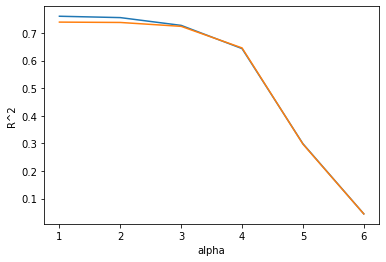

In [ ]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1000)
ridge.fit(train_scaled, y_train)
print(ridge.score(train_scaled, y_train))
print(ridge.score(test_scaled,y_test))

0.7275675655277203
0.7240651196810919


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
# regression은 분류문제와 같이 accuracy 같은 것이 없기 때문에
# regression에 맞는 모델 성능 지표를 써야한다.
# 대표적인 것이 mse이다


pred_tr = ridge.predict(train_scaled)
pred_test = ridge.predict(test_scaled)

rmse_tr = np.sqrt(mean_squared_error(y_train, pred_tr))
rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))

print("RMSE of Train Data : ", rmse_tr)
print("RMSE of Test Data : ", rmse_test)

mae_tr = mean_absolute_error(y_train, pred_tr)
mae_test = mean_absolute_error(y_test, pred_test)
print('\n')
print("MAE of Train Data : ", mae_tr)
print("MAE of Test Data : ", mae_test)


mse_tr = mean_squared_error(y_train, pred_tr)
mse_test =mean_squared_error(y_test, pred_test)
print('\n')
print("MSE of Train Data : ", mse_tr)
print("MSE of Test Data : ", mse_test)

RMSE of Train Data :  115.87367912386568
RMSE of Test Data :  115.94334296681711


MAE of Train Data :  61.24376161857059
MAE of Test Data :  61.20717317635547


MSE of Train Data :  13426.709513700585
MSE of Test Data :  13442.85877832098


라쏘 회귀 (계수의 절대값을 기준으로 규제를 적용)

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, y_train)
print(lasso.score(train_scaled, y_train))

0.7519617771509419


In [ ]:
print(lasso.score(test_scaled, y_test))

0.7401587127140274


In [ ]:
train_score = []
test_score = []

alpha_list =[0.1, 1, 10, 100, 1000, 10000]
for alpha in alpha_list:
    # 라쏘 모델을 만듭니다
    lasso = Lasso(alpha=alpha, max_iter=10000)
    # 라쏘 모델을 훈련합니다
    lasso.fit(train_scaled, y_train)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(lasso.score(train_scaled, y_train))
    test_score.append(lasso.score(test_scaled, y_test))

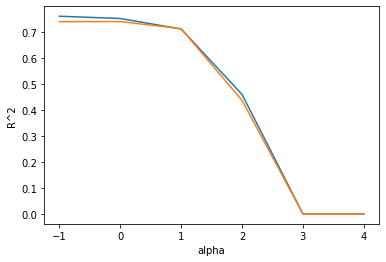

In [ ]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [ ]:
lasso = Lasso(alpha=1)
lasso.fit(train_scaled, y_train)

print(lasso.score(train_scaled,y_train))
print(lasso.score(test_scaled, y_test))

0.7519617771509419
0.7401587127140274


In [ ]:
# regression은 분류문제와 같이 accuracy 같은 것이 없기 때문에
# regression에 맞는 모델 성능 지표를 써야한다.
# 대표적인 것이 mse이다


pred_tr = lasso.predict(train_scaled)
pred_test = lasso.predict(test_scaled)

rmse_tr = np.sqrt(mean_squared_error(y_train, pred_tr))
rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))

print("RMSE of Train Data : ", rmse_tr)
print("RMSE of Test Data : ", rmse_test)

mae_tr = mean_absolute_error(y_train, pred_tr)
mae_test = mean_absolute_error(y_test, pred_test)
print('\n')
print("MAE of Train Data : ", mae_tr)
print("MAE of Test Data : ", mae_test)

mse_tr = mean_squared_error(y_train, pred_tr)
mse_test =mean_squared_error(y_test, pred_test)
print('\n')
print("MSE of Train Data : ", mse_tr)
print("MSE of Test Data : ", mse_test)

RMSE of Train Data :  110.56424290552195
RMSE of Test Data :  112.51141758526089


MAE of Train Data :  58.31354726695746
MAE of Test Data :  58.57012846117348


MSE of Train Data :  12224.451809271262
MSE of Test Data :  12658.819087044953
